In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pickle as pk
plt.style.use('ggplot')

In [20]:
pop = 1000
sim = 300
eps = 100
PATH = lambda x:f'data/pop{pop}-len{sim}-eps{eps}{x}.npy'
AGENTPATH = lambda x:f'data/agents/pop{pop}-len{sim}-eps{eps}bestAG-eps{x}'

# General Data

In [5]:
ass = np.load(PATH('assets'))
buy = np.load(PATH('buy'))
liq = np.load(PATH('liquidity'))
nos = np.load(PATH('noises'))
prs = np.load(PATH('prices'))
sel = np.load(PATH('sell'))

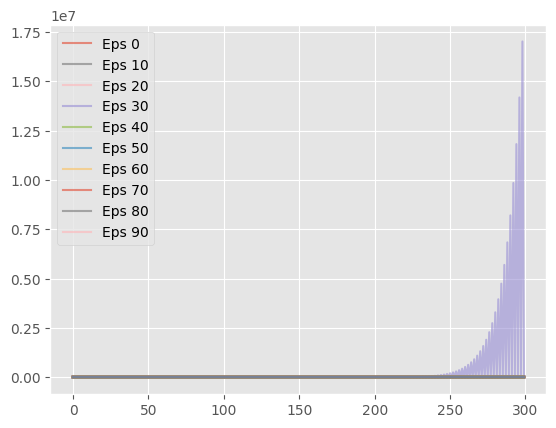

In [6]:
for e in range(100):
    if e%10 == 0:
        plt.plot(ass[e,:], alpha=0.6, label=f'Eps {e}')
    else:
        plt.plot(ass[e,:], alpha=0.6)
plt.legend()
plt.show()

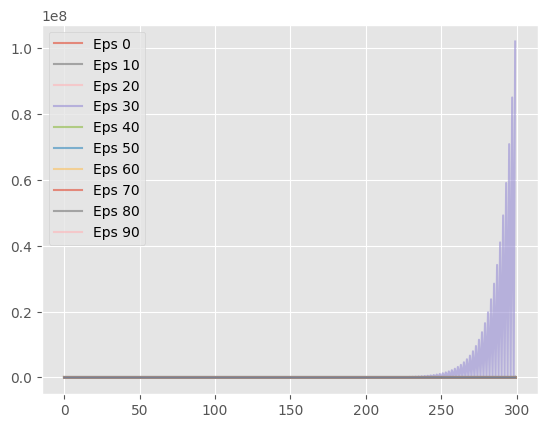

In [7]:
for e in range(100):
    if e%10 == 0:
        plt.plot(liq[e,:], alpha=0.6, label=f'Eps {e}')
    else:
        plt.plot(liq[e,:], alpha=0.6)
plt.legend()
plt.show()

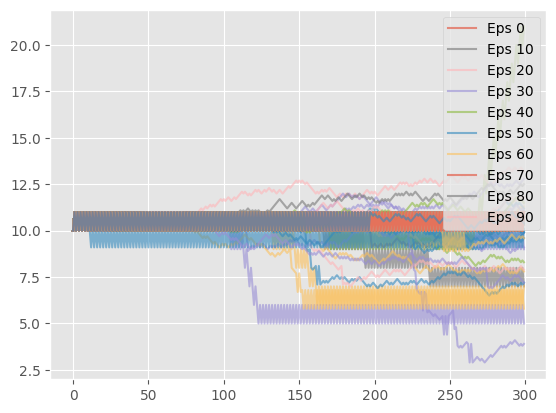

In [8]:
for e in range(100):
    if e%10 == 0:
        plt.plot(prs[e,:], alpha=0.6, label=f'Eps {e}')
    else:
        plt.plot(prs[e,:], alpha=0.6)
plt.legend()
plt.show()

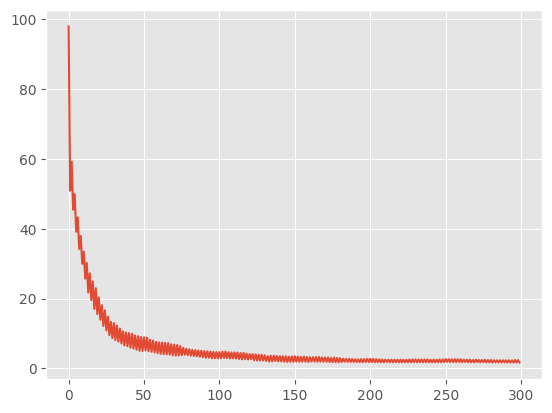

In [27]:
plt.plot(liq[5,:])

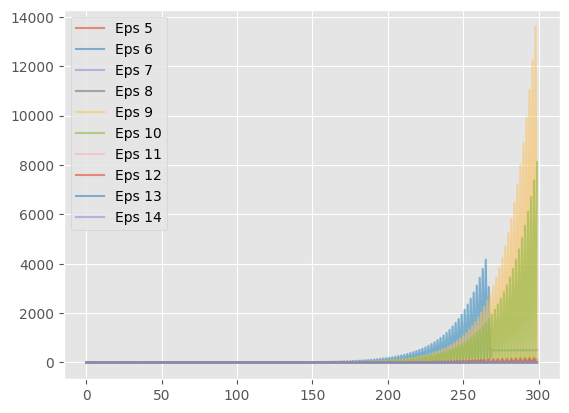

In [15]:
for e in range(5,15):
    if e%1 == 0:
        plt.plot(sel[e,:], alpha=0.6, label=f'Eps {e}')
    else:
        plt.plot(sel[e,:], alpha=0.6)
plt.legend()
plt.show()

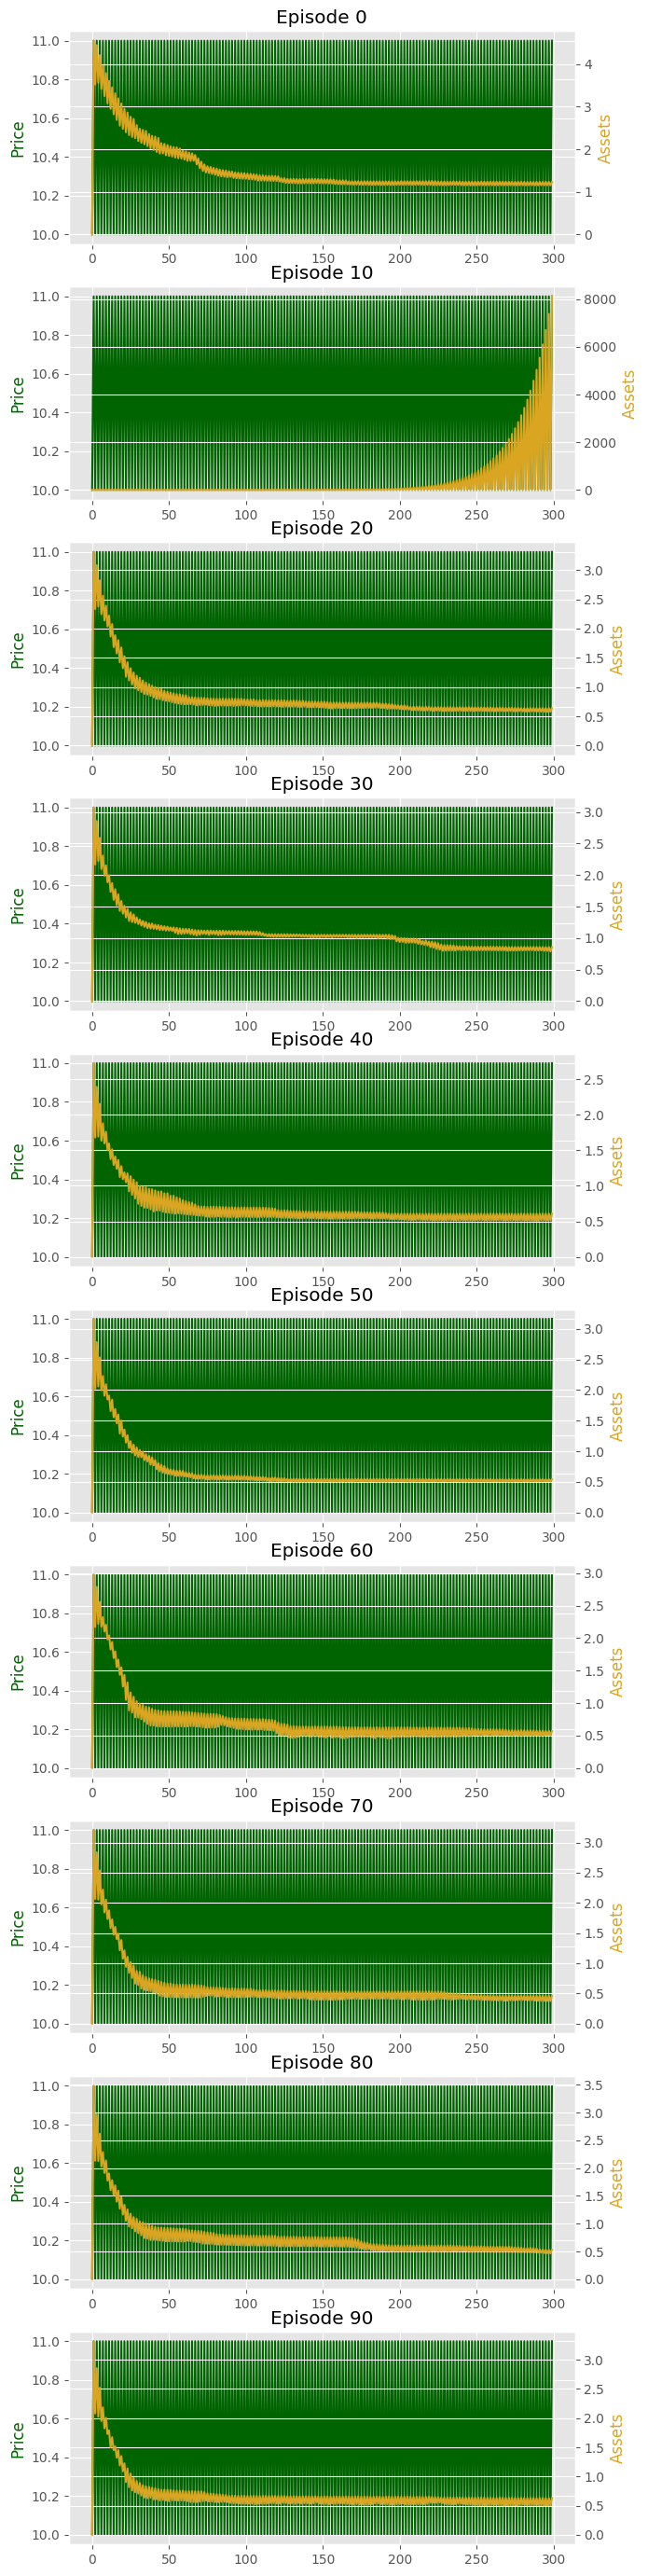

In [9]:
fig, ax = plt.subplots(10,1,figsize=(7,35))

for i,x in enumerate(ax):
    x.plot(prs[i*10,:], color='darkgreen')
    x.set_ylabel("Price", color='darkgreen')
    x.set_title(f"Episode {i*10}")

    x2 = x.twinx()
    x2.plot(ass[i*10,:], color='goldenrod')
    x2.set_ylabel("Assets", color='goldenrod')

plt.show()

# Top Agent

In [22]:
with open(AGENTPATH(9),'rb') as ipt:
    ag9 = pk.load(ipt)

In [31]:
def produce_action(x, agent, decision_range):
    '''
    price, noise, wealth
    '''
    outA = x @ agent.WA
    outA = outA/np.linalg.norm(outA)
    sale_decision = decision_range[np.unravel_index(np.argmax(outA, axis=None), outA.shape)]
    outI = x @ agent.WI
    outI = outI/np.linalg.norm(outI)
    buy_decision = decision_range[np.unravel_index(np.argmax(outI, axis=None), outI.shape)]
    print(f"Sell {sale_decision}% of assets")
    print(f"Invest {buy_decision}% of capital")
    return sale_decision,buy_decision

In [35]:
_ = produce_action([50, 0.5, 500], ag9, np.linspace(0,1,10))

Sell 0.2222222222222222% of assets
Invest 0.1111111111111111% of capital
